# Notebook for exploring Bayesian Interference.

[Medium: How to use Bayesian Interference for Predictions](https://towardsdatascience.com/how-to-use-bayesian-inference-for-predictions-in-python-4de5d0bc84f3)

In [19]:
from scipy import integrate
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

mu
- represents mean height; we are setting this between 1.65 and 1.8

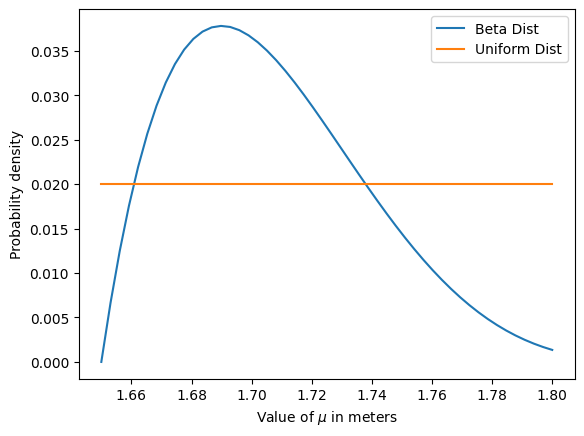

In [12]:
mu = np.linspace(1.65, 1.8, num = 50)

# Using the uniform distribution for clarity, but we can also make the beta
# distribution look completely flat by tweaking alpha and beta!
uniform_dist = sts.uniform.pdf(mu) + 1

# Normalizing the distribution to make the probability densities sum into 1
uniform_dist = uniform_dist/uniform_dist.sum()

beta_dist = sts.beta.pdf(mu, 2, 5, loc = 1.65, scale = 0.2) 
beta_dist = beta_dist/beta_dist.sum()

plt.plot(mu, beta_dist, label = 'Beta Dist')
plt.plot(mu, uniform_dist, label = 'Uniform Dist')
plt.xlabel("Value of $\mu$ in meters")
plt.ylabel("Probability density")
l = plt.legend()

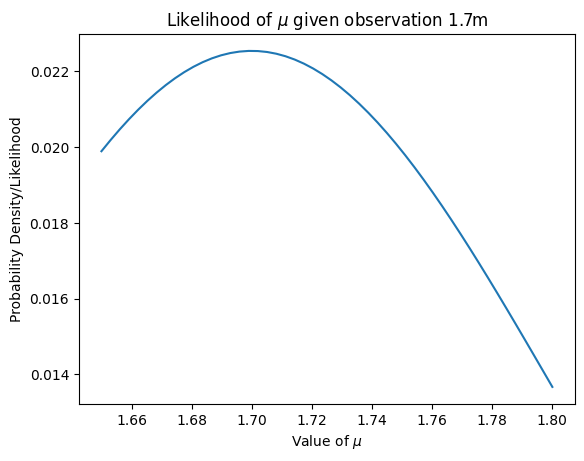

In [15]:
def likelihood_func(datum, mu):
  # Note that mu here is an array of values, so the output is also an array! 
  likelihood_out = sts.norm.pdf(datum, mu, scale = 0.1) 
  return likelihood_out/likelihood_out.sum()

likelihood_out = likelihood_func(1.7, mu)

plt.plot(mu, likelihood_out)
plt.title("Likelihood of $\mu$ given observation 1.7m")
plt.ylabel("Probability Density/Likelihood")
plt.xlabel("Value of $\mu$")
plt.show()

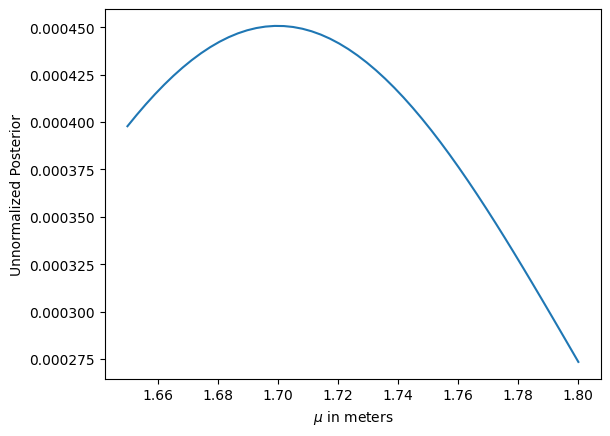

In [16]:
unnormalized_posterior = likelihood_out * uniform_dist
plt.plot(mu, unnormalized_posterior)
plt.xlabel("$\mu$ in meters")
plt.ylabel("Unnormalized Posterior")
plt.show()

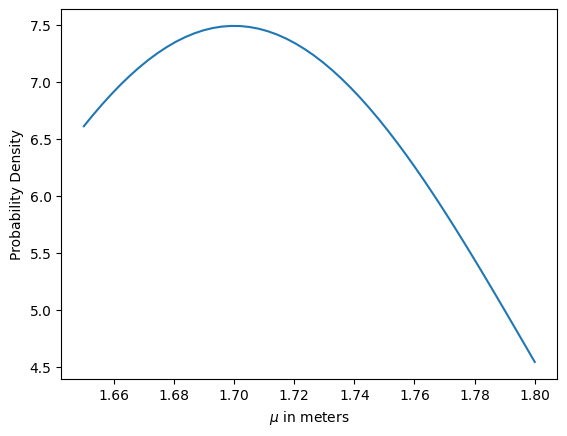

In [21]:
p_data = integrate.trapz(unnormalized_posterior, mu)
normalized_posterior = unnormalized_posterior/(p_data)
plt.plot(mu, normalized_posterior)
plt.xlabel("$\mu$ in meters")
plt.ylabel("Probability Density")
plt.show()

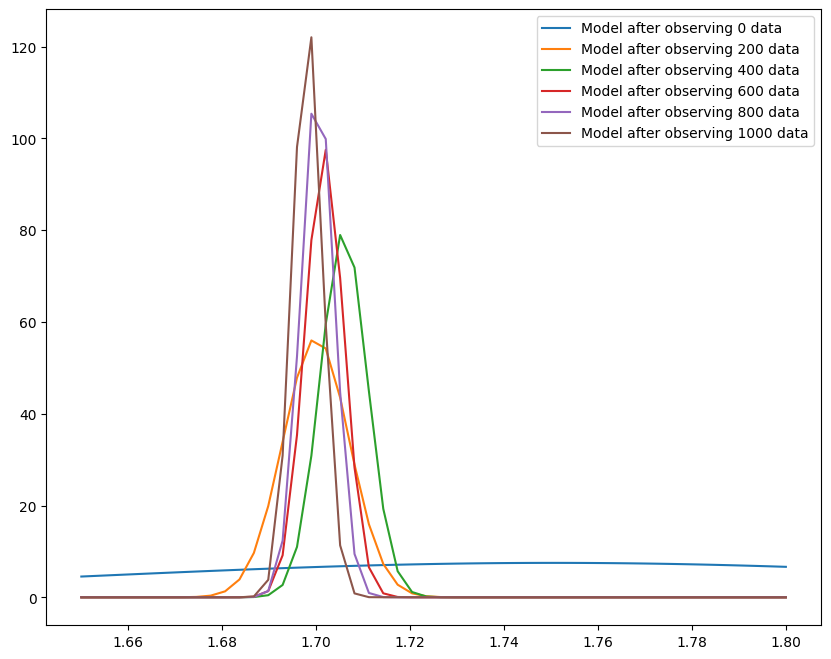

In [22]:
heights_data = sts.norm.rvs(loc = 1.7, scale = 0.1, size = 1001)

prior = uniform_dist
posterior_dict = {}

plt.figure(figsize = (10, 8))

for ind, datum in enumerate(heights_data):
  likelihood = likelihood_func(datum, mu)
  unnormalized_posterior = prior * likelihood
  normalized_posterior = unnormalized_posterior/integrate.trapz(unnormalized_posterior, mu)
  prior = normalized_posterior
  posterior_dict[ind] = normalized_posterior
  if ind%200 == 0:
    plt.plot(mu, normalized_posterior, label = f'Model after observing {ind} data')

plt.legend()
plt.show()

Text(0, 0.5, 'Predicted Mean $\\mu$')

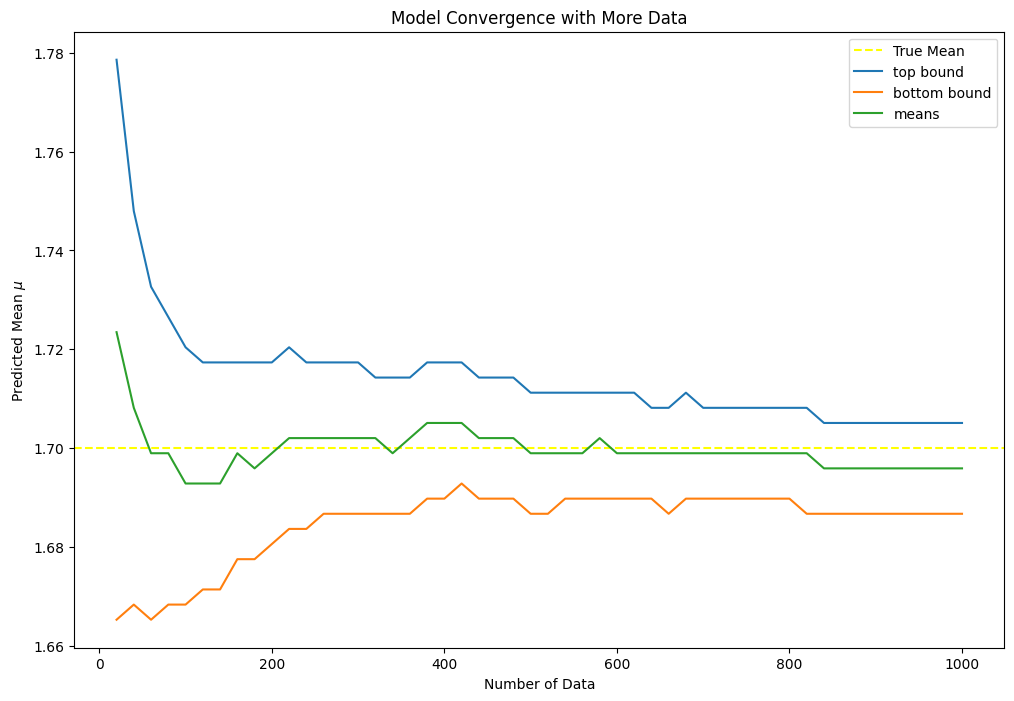

In [23]:
def compute_percentile(parameter_values, distribution_values, percentile):
    cumulative_distribution = integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return parameter_values[percentile_index]

top_bound = means = [compute_percentile(mu, posterior_dict[i], 0.995) for i in range(20, 1001, 20)]
bottom_bound = means = [compute_percentile(mu, posterior_dict[i], 0.005) for i in range(20, 1001, 20)]
means = [compute_percentile(mu, posterior_dict[i], 0.5) for i in range(20, 1001, 20)]
plt.figure(figsize = (12, 8))
plt.axhline(y=1.7, ls = '--', color = 'Yellow', label = 'True Mean')
plt.plot(range(20, 1001, 20), top_bound, label = 'top bound')
plt.plot(range(20, 1001, 20), bottom_bound, label = 'bottom bound')
plt.plot(range(20, 1001, 20), means, label = 'means')
plt.legend()
plt.title('Model Convergence with More Data')
plt.xlabel("Number of Data")
plt.ylabel("Predicted Mean $\mu$")

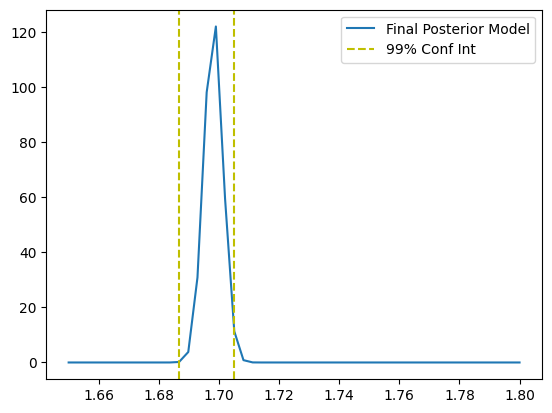

In [24]:
plt.plot(mu, posterior_dict[1000], label = 'Final Posterior Model')
plt.axvline(x = compute_percentile(mu, posterior_dict[1000], 0.005), ls = '--', color = 'y', label = '99% Conf Int')
plt.axvline(x = compute_percentile(mu, posterior_dict[1000], 0.995), ls = '--', color = 'y')
plt.legend()

(array([ 6.,  8., 14., 10., 23., 19.,  9.,  5.,  1.,  5.]),
 array([20. , 22.4, 24.8, 27.2, 29.6, 32. , 34.4, 36.8, 39.2, 41.6, 44. ]),
 <BarContainer object of 10 artists>)

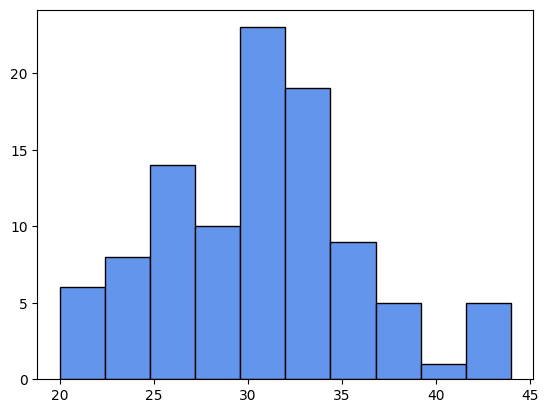

In [27]:
model = sts.norm(loc=1.699, scale=0.1)
results = model.rvs(size = [100, 100])
results_sum = (results > 1.75).sum(axis = 1)
plt.hist(results_sum, edgecolor = 'black', color = 'cornflowerblue')

Our 99% confidence interval lower bound is: 19.495
Our 99% confidence interval upper bound is: 42.504999999999995


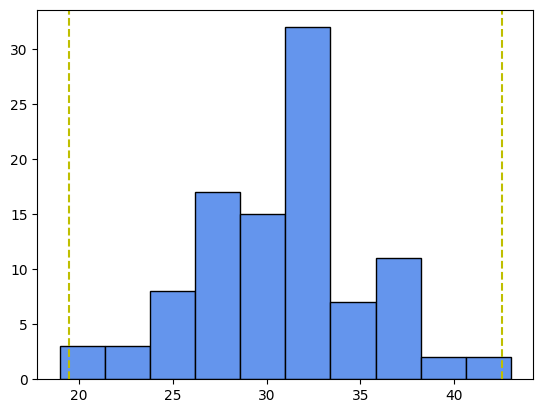

In [28]:
results = model.rvs(size = [100, 100])
results_sum = (results > 1.75).sum(axis = 1)
lower_bound = np.quantile(results_sum, 0.005)
upper_bound = np.quantile(results_sum, 0.995)
plt.hist(results_sum, edgecolor = 'black', color = 'cornflowerblue')
plt.axvline(x = lower_bound, color = 'y', ls = '--')
plt.axvline(x = upper_bound, color = 'y', ls = '--')
print('Our 99% confidence interval lower bound is:', lower_bound)
print('Our 99% confidence interval upper bound is:', upper_bound)